<a href="https://colab.research.google.com/github/jkmolina30/Data_Science-Challenge_Alura_Store/blob/main/AluraStoreLatam.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### Importaci√≥n de datos



In [80]:
import pandas as pd

url = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_1%20.csv"
url2 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_2.csv"
url3 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_3.csv"
url4 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_4.csv"

tienda = pd.read_csv(url)
tienda2 = pd.read_csv(url2)
tienda3 = pd.read_csv(url3)
tienda4 = pd.read_csv(url4)

tienda2.head()

# Unimos todos los archivos en uno solo
dfppal = pd.concat([tienda, tienda2, tienda3, tienda4], ignore_index=True)
dfppal.head()


Producto Categor√≠a del Producto    Precio  Costo de env√≠o  \
0  Asistente virtual           Electr√≥nicos  164300.0          6900.0   
1    Mesa de comedor                Muebles  192300.0          8400.0   
2      Juego de mesa               Juguetes  209600.0         15900.0   
3         Microondas      Electrodom√©sticos  757500.0         41000.0   
4   Silla de oficina                Muebles  335200.0         20200.0   

  Fecha de Compra         Vendedor Lugar de Compra  Calificaci√≥n  \
0      16/01/2021      Pedro Gomez          Bogot√°             4   
1      18/05/2022  Beatriz Morales        Medell√≠n             1   
2      15/03/2021   Juan Fernandez       Cartagena             1   
3      03/05/2022   Juan Fernandez            Cali             4   
4      07/11/2020    Maria Alfonso        Medell√≠n             5   

       M√©todo de pago  Cantidad de cuotas       lat       lon  
0  Tarjeta de cr√©dito                   8   4.60971 -74.08175  
1  Tarjeta de cr√©dito                   4   6.25184 -75.56359  
2  Tarjeta de cr√©dito                   1  10.39972 -75.51444  
3               Nequi                   1   3.43722 -76.52250  
4               Nequi                   1   6.25184 -75.56359

#1. An√°lisis de facturaci√≥n



In [2]:
# Ingreso total por tienda
ingreso_tienda_1 = tienda['Precio'].sum()
ingreso_tienda_2 = tienda2['Precio'].sum()
ingreso_tienda_3 = tienda3['Precio'].sum()
ingreso_tienda_4 = tienda4['Precio'].sum()

ingreso_totales = ingreso_tienda_1 + ingreso_tienda_2 + ingreso_tienda_3 + ingreso_tienda_4

# Mostramos los resultados
print(f'Ingreso total Tienda 1: ${ingreso_tienda_1:,.0f}')
print(f'Ingreso total Tienda 2: ${ingreso_tienda_2:,.0f}')
print(f'Ingreso total Tienda 3: ${ingreso_tienda_3:,.0f}')
print(f'Ingreso total Tienda 4: ${ingreso_tienda_4:,.0f}')
print("")
print(f'Ingresos totales: ${ingreso_totales}')


Ingreso total Tienda 1: $1,150,880,400
Ingreso total Tienda 2: $1,116,343,500
Ingreso total Tienda 3: $1,098,019,600
Ingreso total Tienda 4: $1,038,375,700

Ingresos totales: $4403619200.0


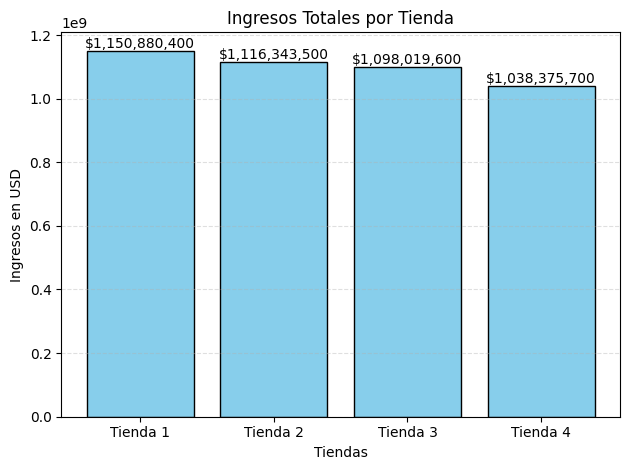

In [3]:
import matplotlib.pyplot as plt

lista_tienda = ["Tienda 1", "Tienda 2", "Tienda 3", "Tienda 4"]
lista_facturacion = [ingreso_tienda_1, ingreso_tienda_2, ingreso_tienda_3, ingreso_tienda_4]

plt.bar(lista_tienda, lista_facturacion, color='skyblue', edgecolor='black')
plt.title('Ingresos Totales por Tienda')
plt.xlabel('Tiendas')
plt.ylabel('Ingresos en USD')
plt.grid(axis='y', linestyle='--', alpha=0.4)

# Mostrar valores encima de cada barra
for i, valor in enumerate(lista_facturacion):
    plt.text(i, valor, f'${valor:,.0f}', ha='center', va='bottom')

plt.tight_layout()
plt.show()

# 2. Ventas por categor√≠a

In [12]:
  tienda["Tienda"] = "Tienda 1"
  tienda2["Tienda"] = "Tienda 2"
  tienda3["Tienda"] = "Tienda 3"
  tienda4["Tienda"] = "Tienda 4"

  dfppal2 = pd.concat([tienda, tienda2, tienda3, tienda4], ignore_index=True)
  ventas_categoria = dfppal2.groupby(["Tienda", "Categor√≠a del Producto"]).size().reset_index(name="Cantidad de Ventas")

  ventas_categoria = ventas_categoria.sort_values(by=["Tienda", "Categor√≠a del Producto"], ascending=[True, False])

  print(ventas_categoria)

      Tienda   Categor√≠a del Producto  Cantidad de Ventas
7   Tienda 1                  Muebles                 465
6   Tienda 1                   Libros                 173
5   Tienda 1                 Juguetes                 324
4   Tienda 1   Instrumentos musicales                 182
3   Tienda 1             Electr√≥nicos                 448
2   Tienda 1        Electrodom√©sticos                 312
1   Tienda 1     Deportes y diversi√≥n                 284
0   Tienda 1  Art√≠culos para el hogar                 171
15  Tienda 2                  Muebles                 442
14  Tienda 2                   Libros                 197
13  Tienda 2                 Juguetes                 313
12  Tienda 2   Instrumentos musicales                 224
11  Tienda 2             Electr√≥nicos                 422
10  Tienda 2        Electrodom√©sticos                 305
9   Tienda 2     Deportes y diversi√≥n                 275
8   Tienda 2  Art√≠culos para el hogar                 181
23  T

# 3. Calificaci√≥n promedio de la tienda


In [81]:
# Calcular promedios
promedio_tienda_1 = tienda['Calificaci√≥n'].mean()
promedio_tienda_2 = tienda2['Calificaci√≥n'].mean()
promedio_tienda_3 = tienda3['Calificaci√≥n'].mean()
promedio_tienda_4 = tienda4['Calificaci√≥n'].mean()

# Guardar en listas
lista_tienda = ["Tienda 1", "Tienda 2", "Tienda 3", "Tienda 4"]
lista_prome = [promedio_tienda_1, promedio_tienda_2, promedio_tienda_3, promedio_tienda_4]

# Calcular el total para porcentajes
total_promedios = sum(lista_prome)

# Calcular el porcentaje respecto al total
porcentajes = [(p / total_promedios) * 100 for p in lista_prome]

# Imprimir resultados
for tienda, promedio, porcentaje in zip(lista_tienda, lista_prome, porcentajes):
    print(f"{tienda}: Promedio = {promedio:.4f}, Porcentaje del total = {porcentaje:.2f}%")



Tienda 1: Promedio = 3.9767, Porcentaje del total = 24.76%
Tienda 2: Promedio = 4.0373, Porcentaje del total = 25.14%
Tienda 3: Promedio = 4.0483, Porcentaje del total = 25.21%
Tienda 4: Promedio = 3.9958, Porcentaje del total = 24.88%


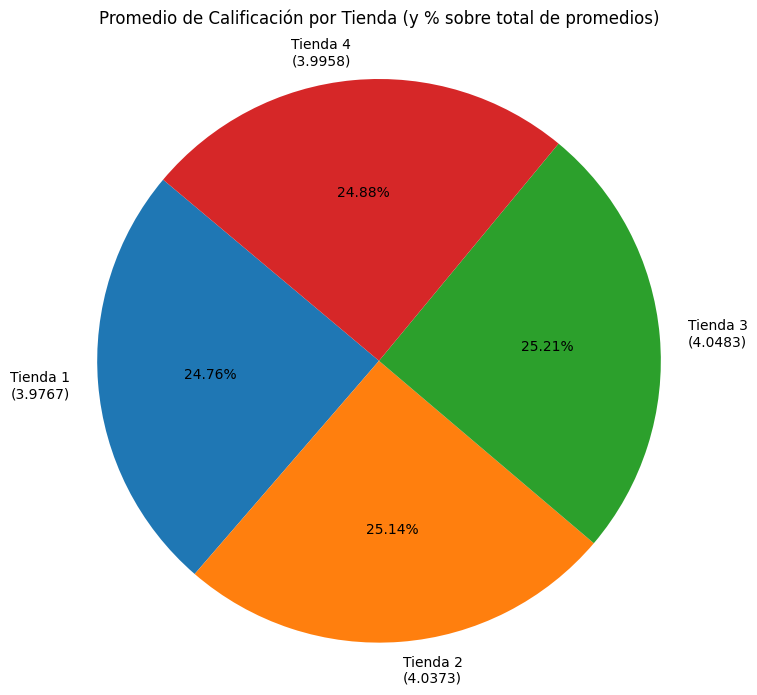

In [83]:
"""import matplotlib.pyplot as plt

lista_tienda = ["Tienda 1", "Tienda 2", "Tienda 3", "Tienda 4"]
lista_promedio = [promedio_tienda_1, promedio_tienda_2, promedio_tienda_3, promedio_tienda_4]

plt.figure(figsize=(8, 8))
plt.pie(lista_promedio, labels=lista_tienda, autopct='%1.2f%%', startangle=140)
plt.title("Promedio de Calificaci√≥n por Tienda")
plt.axis('equal')  # Asegura que el gr√°fico sea circular
plt.show()"""

# Gr√°fico de pastel con valor + porcentaje
plt.figure(figsize=(8, 8))
plt.pie(
    lista_prome,
    labels=[f"{t}\n({p:.4f})" for t, p in zip(lista_tienda, lista_prome)],
    autopct=lambda pct: f"{pct:.2f}%",
    startangle=140
)
plt.title("Promedio de Calificaci√≥n por Tienda (y % sobre total de promedios)\n")
plt.axis('equal')
plt.show()


# 4. Productos m√°s y menos vendidos

In [6]:
# Contar cu√°ntas veces se vendi√≥ cada producto
ventas_por_producto = dfppal['Producto'].value_counts().reset_index()
ventas_por_producto.columns = ['Producto', 'Cantidad Vendida']

# Producto m√°s vendido
producto_mas_vendido = ventas_por_producto.iloc[0]
print(f"üìà Producto m√°s vendido: {producto_mas_vendido['Producto']} - {producto_mas_vendido['Cantidad Vendida']} unidades")

# Producto menos vendido
producto_menos_vendido = ventas_por_producto.iloc[-1]
print(f"üìâ Producto menos vendido: {producto_menos_vendido['Producto']} - {producto_menos_vendido['Cantidad Vendida']} unidad(es)")

üìà Producto m√°s vendido: Mesa de noche - 210 unidades
üìâ Producto menos vendido: Celular ABXY - 157 unidad(es)


Top 10 productos m√°s vendidos:
                    Producto  Cantidad Vendida
0              Mesa de noche               210
1  Carrito de control remoto               206
2                 Microondas               206
3                    Bater√≠a               203
4                  Cama king               201
5           Secadora de ropa               200
6        Modelado predictivo               200
7               Set de ollas               200
8                   Cama box               199
9    Bloques de construcci√≥n               199


<ipython-input-7-8154e3423d07>:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Cantidad Vendida', y='Producto', data=top_10, palette='Blues')


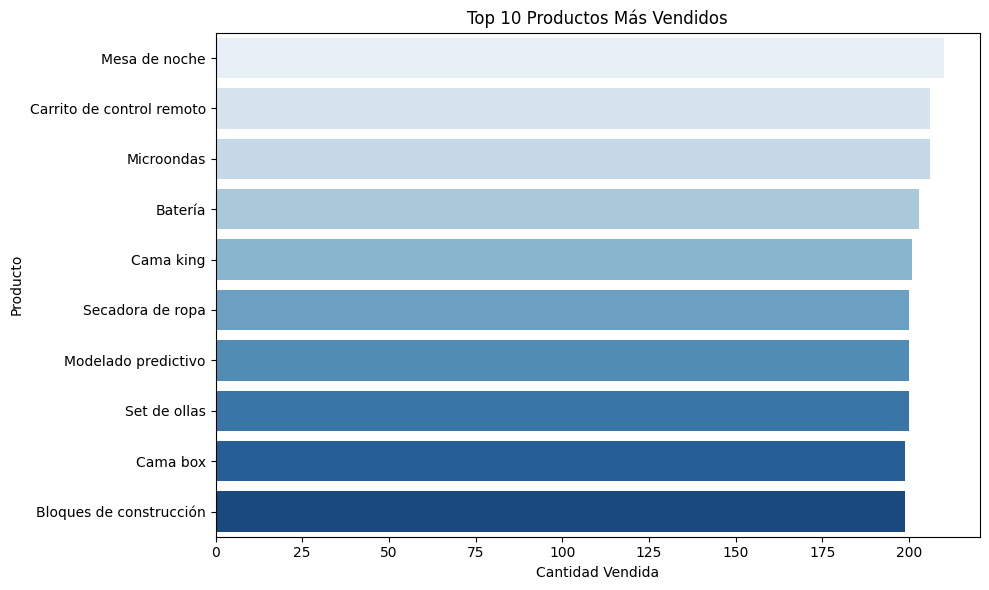

In [7]:
import seaborn as sns
import matplotlib.pyplot as plt

#TOP 10 DE PRODUCTOS MAS VENDIDOS
print("Top 10 productos m√°s vendidos:")
print(ventas_por_producto.head(10))



top_10 = ventas_por_producto.head(10)

plt.figure(figsize=(10, 6))
sns.barplot(x='Cantidad Vendida', y='Producto', data=top_10, palette='Blues')
plt.title('Top 10 Productos M√°s Vendidos')
plt.xlabel('Cantidad Vendida')
plt.ylabel('Producto')
plt.tight_layout()
plt.show()

Top 10 productos m√°s vendidos:
                       Producto  Cantidad Vendida
41              Olla de presi√≥n               172
42                   Smartwatch               172
43                 Set de vasos               169
44                       Sill√≥n               168
45            Asistente virtual               167
46  Ciencia de datos con Python               166
47           Guitarra el√©ctrica               165
48                      Mochila               163
49    Auriculares con micr√≥fono               158
50                 Celular ABXY               157


<ipython-input-8-3f10f7ab0379>:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Cantidad Vendida', y='Producto', data=top_10, palette='Blues')


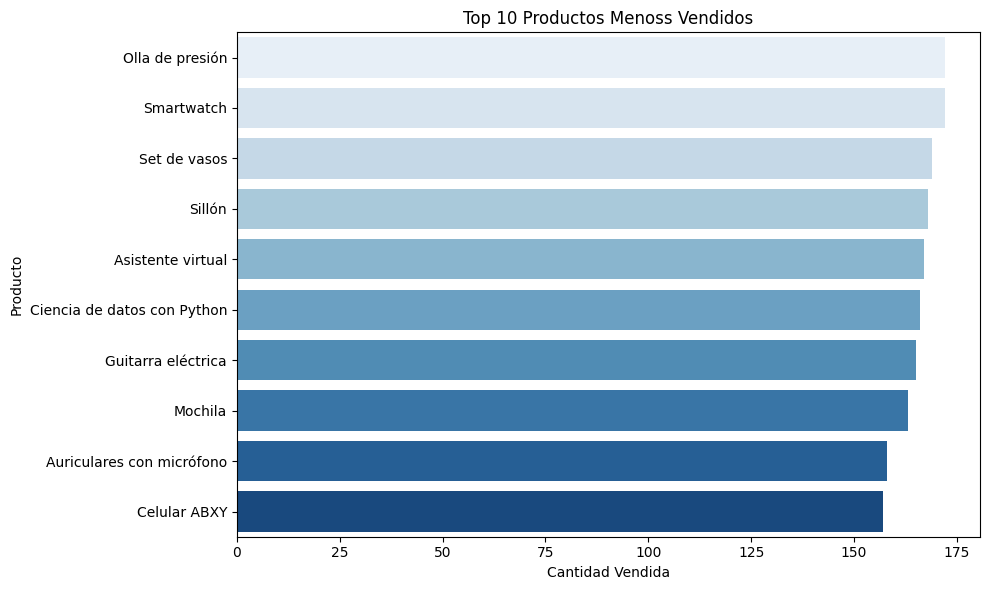

In [8]:
import seaborn as sns
import matplotlib.pyplot as plt

#TOP 10 DE PRODUCTOS MENOS VENDIDOS
print("Top 10 productos m√°s vendidos:")
print(ventas_por_producto.tail(10))



top_10 = ventas_por_producto.tail(10)

plt.figure(figsize=(10, 6))
sns.barplot(x='Cantidad Vendida', y='Producto', data=top_10, palette='Blues')
plt.title('Top 10 Productos Menoss Vendidos')
plt.xlabel('Cantidad Vendida')
plt.ylabel('Producto')
plt.tight_layout()
plt.show()

# 5. Env√≠o promedio por tienda

In [9]:
# Ingreso total por tienda
promedio_costo_tienda_1 = tienda['Costo de env√≠o'].mean()
promedio_costo_tienda_2 = tienda2['Costo de env√≠o'].mean()
promedio_costo_tienda_3 = tienda3['Costo de env√≠o'].mean()
promedio_costo_tienda_4 = tienda4['Costo de env√≠o'].mean()

# Mostramos los resultados
print(f'Promedio Env√≠o por Tienda 1: {promedio_costo_tienda_1}')
print(f'Promedio Env√≠o por Tienda 2: {promedio_costo_tienda_2}')
print(f'Promedio Env√≠o por Tienda 3: {promedio_costo_tienda_3}')
print(f'Promedio Env√≠o por Tienda 4: {promedio_costo_tienda_4}')

Promedio Env√≠o por Tienda 1: 26018.60958033065
Promedio Env√≠o por Tienda 2: 25216.235693090293
Promedio Env√≠o por Tienda 3: 24805.680373039424
Promedio Env√≠o por Tienda 4: 23459.457167090754


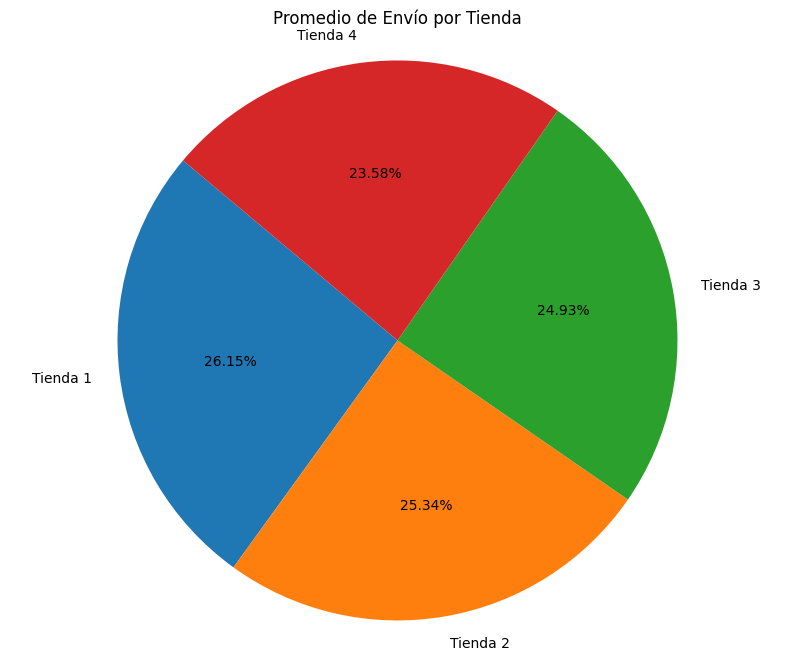

In [10]:
import matplotlib.pyplot as plt

lista_tienda = ["Tienda 1", "Tienda 2", "Tienda 3", "Tienda 4"]
lista_promedio = [promedio_costo_tienda_1, promedio_costo_tienda_2, promedio_costo_tienda_3, promedio_costo_tienda_4]

plt.figure(figsize=(10, 8))
plt.pie(lista_promedio, labels=lista_tienda, autopct='%1.2f%%', startangle=140)
plt.title("Promedio de Env√≠o por Tienda")
plt.axis('equal')  # Asegura que el gr√°fico sea circular
plt.show()

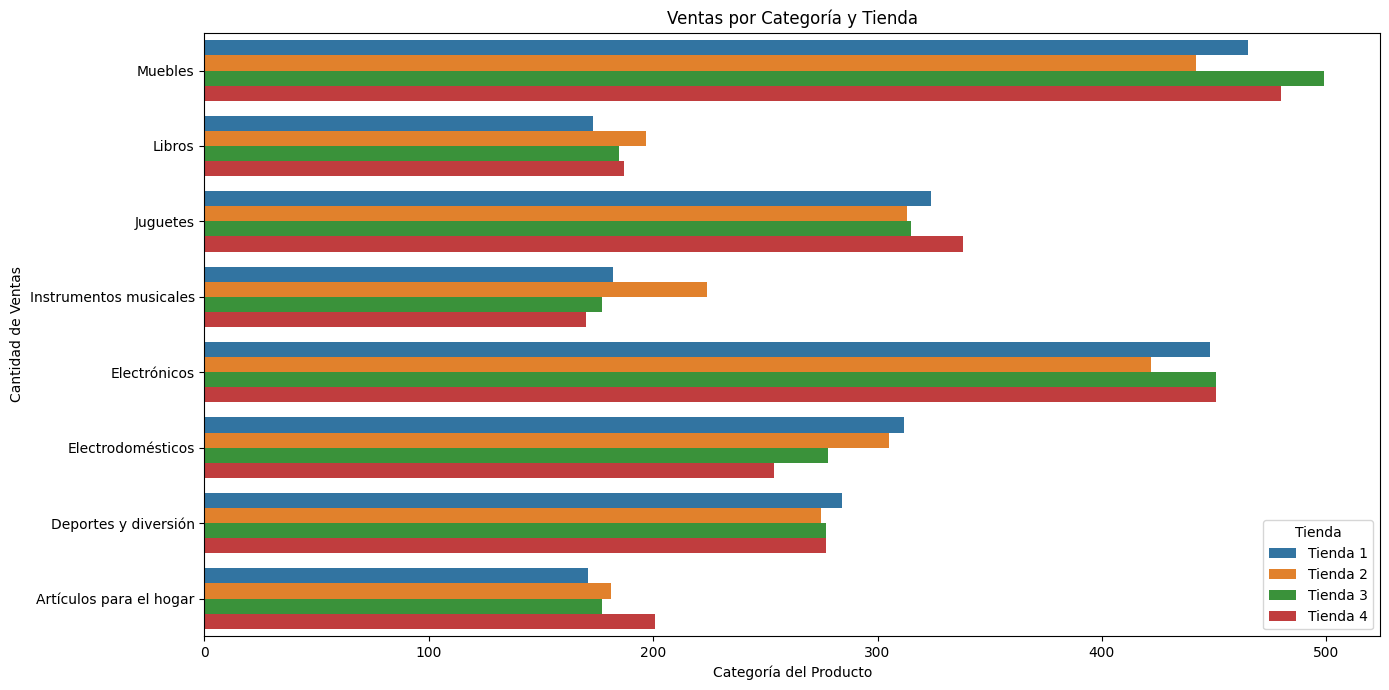

In [13]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(14, 7))
sns.barplot(data=ventas_categoria,
            y="Categor√≠a del Producto",
            x="Cantidad de Ventas",
            hue="Tienda")

plt.title("Ventas por Categor√≠a y Tienda")
plt.xlabel("Categor√≠a del Producto")
plt.ylabel("Cantidad de Ventas")
plt.xticks(rotation=0)
plt.legend(title="Tienda")
plt.tight_layout()
plt.show()


#6 ANALISIS

De acuerdo con la grafica numero 1-Analisis de Facturaci√≥n. En la cual se puede evidenciar que es la tienda que menos facturacion o menos ventas registro

Ingreso total Tienda 1: 1.150.880.400
Ingreso total Tienda 2: 1.116.343.500
Ingreso total Tienda 3: 1.098.019.600
**Ingreso total Tienda 4: 1.038.375.700**

Ademas con la grafica del promedio de envio, tambien podemos observar que es la tienda que tuvo el promedio mas bajo de envios.

Promedio Env√≠o por Tienda 1: 26.15
Promedio Env√≠o por Tienda 2: 25.34
Promedio Env√≠o por Tienda 3: 24.93
Promedio Env√≠o por Tienda 4: 23.58


Por ultimo en el promedio de las calificaciones de cada tienda, la tienda # 4 ocupa el segundo lugar con peor promedio de calificacion por debajo de la tienda # 1

Tienda 1: Promedio = 3.9767, Porcentaje del total = 24.76%
Tienda 2: Promedio = 4.0373, Porcentaje del total = 25.14%
Tienda 3: Promedio = 4.0483, Porcentaje del total = 25.21%
Tienda 4: Promedio = 3.9958, Porcentaje del total = 24.88%


De acuerdo con estos datos, yo le recomendar√≠a al Se√±or Juan que debe de vender la Tienda 4 para invertir en un nuevo negocio.